## The Euler-Maruyama method

The Euler-Maruyama method involves discretizing time and adding infinitesimal steps to the process at every time step. This method involves a deterministic term (like in the standard Euler method for ODEs) and a stochastic term (random Gaussian variable). Specifically, for an equation:

$$dx_{t}= -\lambda x_{t}dt+dW_{t} $$

The numerical scheme is (with $t=n∗dt$):

$$x_{n+1}=x_{n}+dx=x_{n}-\lambda x_{n}dt+ξ\sqrt{dt} , \: ξ∼N(0,1)$$

Here, ξ is a random Gaussian variable with variance 1 (independent at each time step). The normalization factor $\sqrt{dt}$ comes from the fact that the infinitesimal step for a Brownian motion has the standard deviation $\sqrt{dt}$ .

The analytical solution for the above SDE is given by,

$$x_{t} = x_{0}e^{-\lambda t} + \int_0^t e^{-\lambda (s-t)}w(s)ds$$

Mean is given by,

$$m(t) = x_{0}e^{-\lambda t} $$

Variance is given by,

$$p(t) = \frac{1}{2\lambda} (1 - e^{-2\lambda t})$$

In [101]:
matplotlib.rc('font', size=20)
matplotlib.rc('font', family='serif')
matplotlib.rc('figure', figsize=(14, 8))
matplotlib.rc('lines', linewidth=2)
matplotlib.rc('lines', markersize=10)
matplotlib.rc('figure.subplot', hspace=.4)

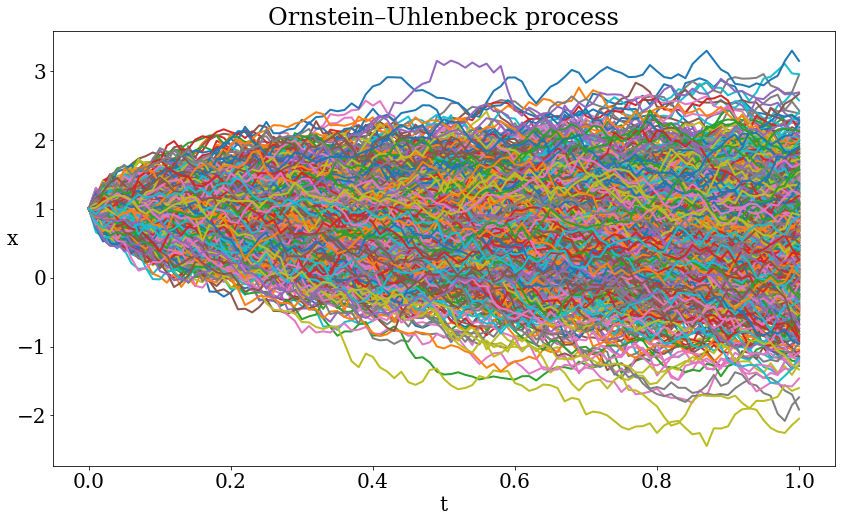

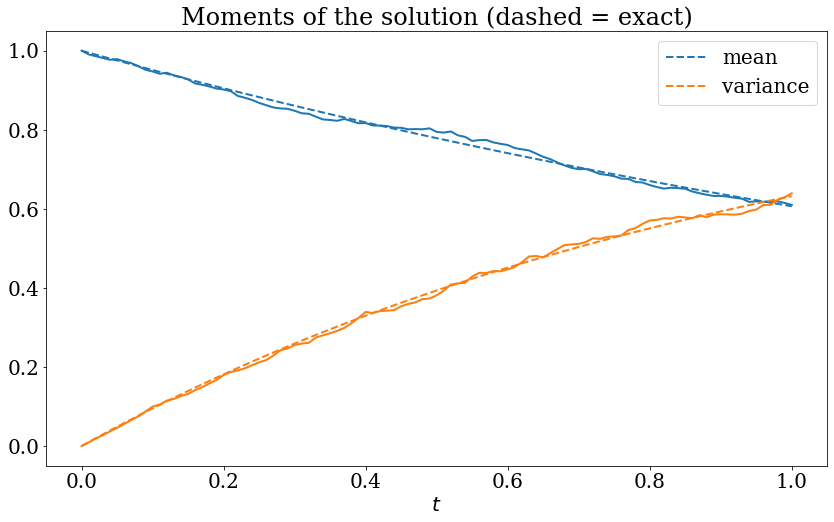

In [110]:
import numpy as np
import matplotlib.pyplot as plt

num_sims =  1000 # Display five runs

t_init = 0
t_end  = 1
N      = 100  # Compute 100 grid points
dt     = float(t_end - t_init) / N
y_init = 1

c_theta = 0.5
c_mu    = 0
c_sigma = 1

def mu(y, t):
    """Implement the Ornstein–Uhlenbeck mu."""  # = \theta (\mu-Y_t)
    return c_theta * (c_mu - y)

def sigma(y, t):
    """Implement the Ornstein–Uhlenbeck sigma."""  # = \sigma
    return c_sigma

def dW(delta_t):
    """Sample a random number at each call."""
    return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))

ts = np.arange(t_init, t_end+dt, dt)
ys = np.zeros(N + 1)
rand_mat = []        # creating an empty list to store the values of all 1000 realizations of the stochastic process.
ys[0] = y_init

for i_ in range(num_sims):
    for i in range(1, ts.size):
        t = t_init + (i - 1) * dt
        y = ys[i - 1]
        ys[i] = y + mu(y, t) * dt + sigma(y, t) * dW(dt)
        rand_mat.append(ys[i])
        if i == len(ts)-1:
            rand_mat.insert(101*i_,1)
    plt.plot(ts, ys)

rand_mat = np.array(np.array_split(rand_mat,num_sims)).T

plt.xlabel("t")
plt.title("Ornstein–Uhlenbeck process")
h = plt.ylabel("x")
h.set_rotation(0)
plt.savefig('numerical solution.png')
plt.show()


# Compare with exact moments
fig, ax = plt.subplots()
exact_mean = np.exp(-c_theta*ts)*(y_init)
exact_var = 1/(2*c_theta) * (1 - np.exp(-2*theta*ts))
ax.set_title("Moments of the solution (dashed = exact)")
ax.set_xlabel("$t$")
ax.plot(ts, np.mean(rand_mat, axis=1))
ax.plot(ts, np.var(rand_mat, axis=1))
# Reset color cycle
ax.set_prop_cycle(None)
ax.plot(ts, exact_mean, linestyle="--",label="mean")
ax.plot(ts, exact_var, linestyle="--",label="variance")
plt.legend()
plt.show()
fig.savefig('moments trajectories.png')
